In [1]:
%%javascript
if($(IPython.toolbar.selector.concat(' > #kill-run-all')).length == 0){
  IPython.toolbar.add_buttons_group([
        {
             'label'   : 'kill and run-all',
             'icon'    : 'fa fa-angle-double-down',
             'callback': function(){
                 IPython.notebook.kernel.restart();
                 $(IPython.events).one('kernel_ready.Kernel',
                                       function(){IPython.notebook.execute_all_cells();});
             }
        }
    ], 'kill-run-all');
}

<IPython.core.display.Javascript object>

In [5]:
import seaborn as sns
from foof.util import create_psd

# I did a bad 
%pylab inline 

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
 [py.warnings]
  warnings.warn(self.msg_depr % (key, alt_key))



Populating the interactive namespace from numpy and matplotlib


# Playing with util functions

In [3]:
from syncological import inputs as util

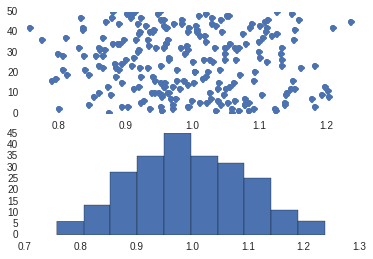

In [4]:
t = 1

window = 500/1000.
t_min = t - window/2
t_max = t + window/2

stdev = 100/1000. # 100 ms

N = 50
rate = 10
k = N * (rate / 2)

ts, idxs = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
subplot(211)
plot(ts, idxs, 'o')
xlim(.75, 1.25)

subplot(212)
_ = hist(ts)

# Play with new fakespikes things

In [5]:
from fakespikes import util as futil

In [6]:
x1 = 'ac'
x2 = 'abc'
x1 = [2,4, 1,5,10]
x2 = [1,4, 10]
futil.levenshtein(x2, x1)

3

In [7]:
# Practice comparing codes
dt = 1/10000.
ts1, ns1 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
ts2, ns2 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)

ordered1, _ = futil.ts_sort(ns1, ts1)
ordered2, _ = futil.ts_sort(ns2, ts2)

futil.levenshtein(list(ordered1), list(ordered2))

221

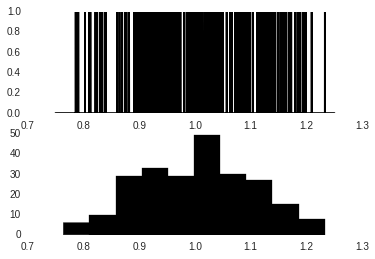

In [8]:
n_sample = int((t_max - t_min) * (1.0 / dt))
ts1, ns1 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
bt, b1 = futil.bin_times(ts1, (t_min, t_max), dt)
subplot(211)
plot(bt, b1, color='k')
subplot(212)
_ = hist(ts1, color='k')

In [13]:
# Fun with kappa
dt = 1/10000.
ts1, ns1 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
ts2, ns2 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
r = futil.kappa(ns1, ts1, ns1, ts1, (t_min, t_max), dt*10)

print(r)
futil.kappa??

0.0293301830548


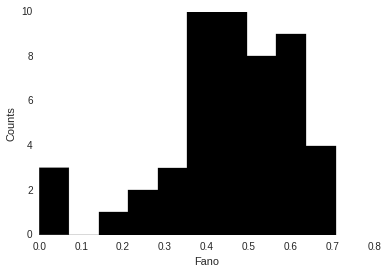

In [10]:
# Fun with fano
dt = 1/10000.
ts1, ns1 = util.gaussian_impulse(t, t_min, t_max, stdev, N, k, decimals=4)
fanos = futil.fano(ns1, ts1)

_ = hist(fanos.values(), color='k')
xlabel("Fano")
ylabel("Counts")

# Trying to get my head around xi

In [11]:
%run ../xi_test.py 

ERROR: File `u'../xi_test.py'` not found.


In [12]:
hist(states.x[0])

NameError: name 'states' is not defined

In [1]:
from syncological.results import load_results, compare

In [2]:
res = load_results(1, "../data/exp206/")

In [18]:
ns, ts = res['spiketimes_i'][:,0], res['spiketimes_i'][:,1]

array([ 2.09276,  2.09278,  2.0928 ,  2.09298,  2.09306,  2.09307,
        2.09313,  2.09316,  2.09348])

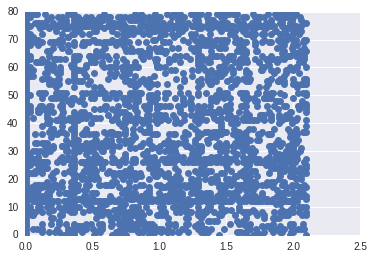

In [19]:
plot(ts, ns, 'o')
ts[-10:-1]

In [3]:
compare(1, [2, 3], "../data/exp206")

2.09353


defaultdict(list,
            {'kl_course_rate_e': [0.15731526046772965, 0.064060369048414847],
             'kl_fine_rate_e': [0.39115300357655014, 0.68659126433181739],
             'kl_spike_e': [0.099676190064896336, 0.070416888255193474],
             'lev_course_rate_e': [20, 16],
             'lev_course_rate_e_n': [0.5, 0.4],
             'lev_fine_rate_e': [316, 313],
             'lev_fine_rate_e_n': [0.7577937649880095, 0.750599520383693],
             'lev_spike_e': [1615, 1653],
             'lev_spike_e_n': [0.7123952359947067, 0.7291574768416409],
             'models': [2, 3],
             's_isi_e': [nan, nan],
             's_sync_e': [0.42133204633204635, 0.3951367781155015]})

In [23]:
np.array(ts).shape

(2625,)